<a href="https://colab.research.google.com/github/CALETATO/ganleche-tech/blob/main/ganlechetech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import scipy.stats as stats

from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV

from sklearn.model_selection import cross_val_score, cross_validate

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from yellowbrick.regressor import ResidualsPlot, PredictionError

import warnings
warnings.filterwarnings("ignore")

In [2]:
ganleche = pd.read_excel('Data/ganleche.xlsx')
df = ganleche.copy()

In [3]:
df.head()

,Clase,ID_Animal,Prod_Octubre,Prod_Noviembre,Prod_Diciembre
0,Alta_Prod,660,579.57,612.78,569.175
1,Alta_Prod,9062,461.34,490.88,473.110
2,Alta_Prod,52,681.97,610.37,652.170
3,Alta_Prod,1989,470.60,520.05,485.325
4,Alta_Prod,243718,466.58,454.51,458.545


In [4]:
df.sample(5)

,Clase,ID_Animal,Prod_Octubre,Prod_Noviembre,Prod_Diciembre
48,Alta_Nov,89071,541.65,552.94,567.65
163,Elite,1528,740.69,712.36,722.25
42,Alta_Nov,10751,491.17,508.31,509.33
87,Alta_Nov,95071,663.44,639.68,631.67
56,Alta_Nov,7590,484.60,463.80,464.70


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Clase           221 non-null    object 
 1   ID_Animal       221 non-null    int64  
 2   Prod_Octubre    221 non-null    float64
 3   Prod_Noviembre  221 non-null    float64
 4   Prod_Diciembre  221 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 8.8+ KB


In [6]:
missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"Cuantos Nulos": missing_count, "Porcentaje": missing_percentage})
missing_df

,Cuantos Nulos,Porcentaje
Clase,0,0.0
ID_Animal,0,0.0
Prod_Octubre,0,0.0
Prod_Noviembre,0,0.0
Prod_Diciembre,0,0.0


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID_Animal,221.0,109067.923077,207133.721514,9.00,2478.00,21428.00,90758.00,913319.00
Prod_Octubre,221.0,518.699579,165.245381,68.30,383.56,512.41,644.23,903.03
Prod_Noviembre,221.0,527.277412,119.155538,250.41,430.76,516.16,627.71,785.92
Prod_Diciembre,221.0,527.369158,135.759305,244.05,408.80,521.15,631.67,818.96


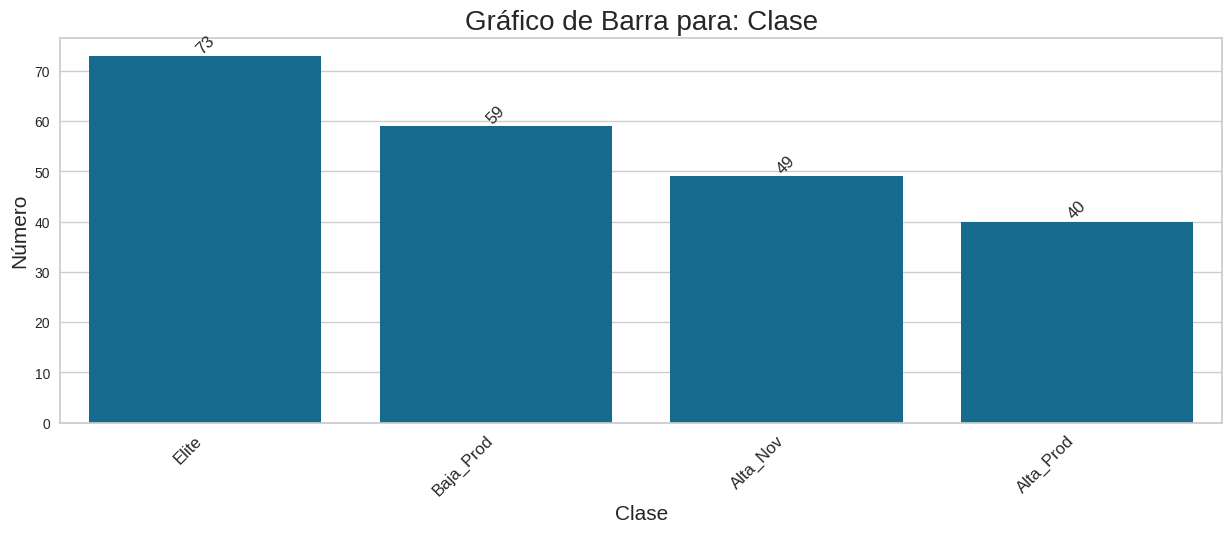

In [8]:
import plotly.graph_objects as go
import plotly.express as px

def plot_bar_graphs(df, columns):
    for column in columns:
        plt.figure(figsize=(15, 5))
        ax = sns.countplot(x=column, data=df, order=df[column].value_counts().index)
        ax.bar_label(ax.containers[0],rotation=45)
        plt.xlabel(column, fontsize=15)
        plt.ylabel('Número', fontsize=15)
        plt.title(f'Gráfico de Barra para: {column}', fontsize=20)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.show()

cat_features = ['Clase']

plot_bar_graphs(df, cat_features)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Clase           221 non-null    object 
 1   ID_Animal       221 non-null    int64  
 2   Prod_Octubre    221 non-null    float64
 3   Prod_Noviembre  221 non-null    float64
 4   Prod_Diciembre  221 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 8.8+ KB


Text(0.5, 1.0, 'Production October vs Production December')

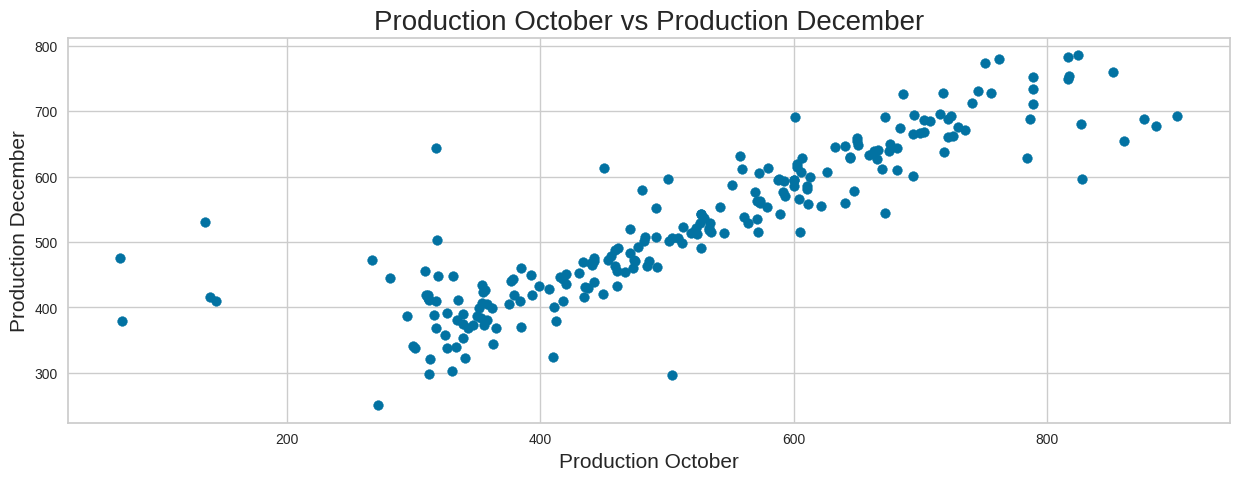

In [10]:
plt.figure(figsize=(15, 5))
plt.scatter(x=df["Prod_Octubre"],y=df["Prod_Noviembre"])
plt.xlabel("Production October", fontsize=15)
plt.ylabel("Production December", fontsize=15)
plt.title("Production October vs Production December", fontsize=20)

In [11]:
import plotly.express as px
fig = px.scatter(df, x="Prod_Octubre", y="Prod_Noviembre", color="Clase")
fig.show()

In [12]:
df.isnull().sum()/df.shape[0]*100

,0
Clase,0.0
ID_Animal,0.0
Prod_Octubre,0.0
Prod_Noviembre,0.0
Prod_Diciembre,0.0


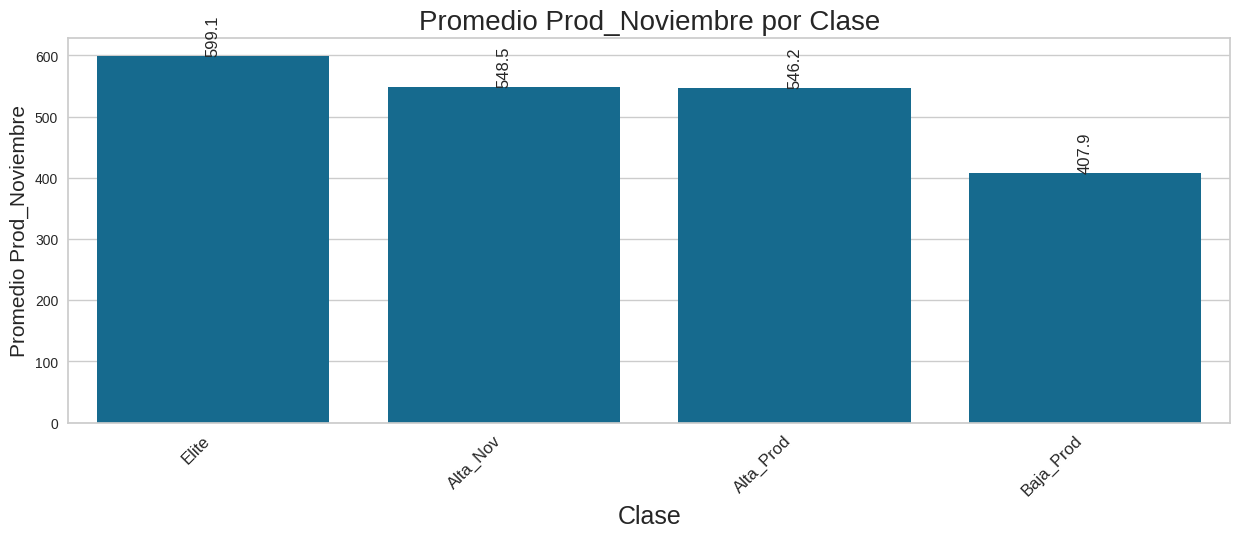

In [13]:
def plot_bar_with_co2(df, columns):
    for column in columns:
        plt.figure(figsize=(15, 5))
        grouped_data = df.groupby(column)['Prod_Noviembre'].mean().round(1).reset_index()
        grouped_data_sorted = grouped_data.sort_values(by='Prod_Noviembre', ascending=False)
        ax = sns.barplot(x=column, y='Prod_Noviembre', data=grouped_data_sorted, order=grouped_data_sorted[column])
        ax.bar_label(ax.containers[0],rotation=90)
        plt.xlabel(column, fontsize=18)
        plt.ylabel('Promedio Prod_Noviembre', fontsize=15)
        plt.title(f'Promedio Prod_Noviembre por {column}', fontsize=20)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.show()

plot_bar_with_co2(df, cat_features)

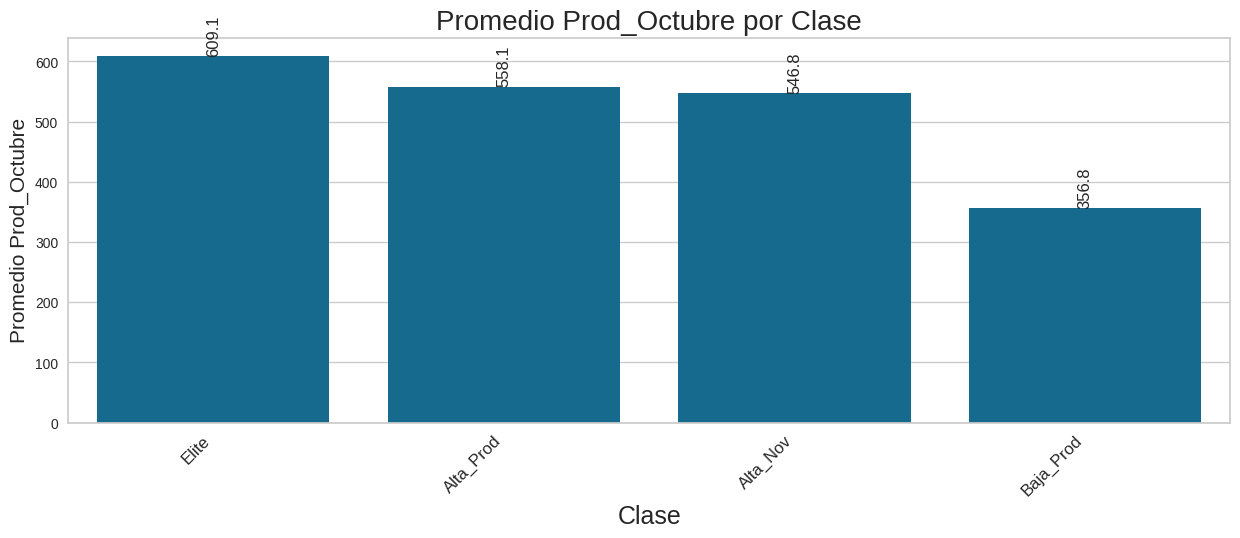

In [14]:
def plot_bar_with_co2(df, columns):
    for column in columns:
        plt.figure(figsize=(15, 5))
        grouped_data = df.groupby(column)['Prod_Octubre'].mean().round(1).reset_index()
        grouped_data_sorted = grouped_data.sort_values(by='Prod_Octubre', ascending=False)
        ax = sns.barplot(x=column, y='Prod_Octubre', data=grouped_data_sorted, order=grouped_data_sorted[column])
        ax.bar_label(ax.containers[0],rotation=90)
        plt.xlabel(column, fontsize=18)
        plt.ylabel('Promedio Prod_Octubre', fontsize=15)
        plt.title(f'Promedio Prod_Octubre por {column}', fontsize=20)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.show()

plot_bar_with_co2(df, cat_features)

In [15]:
from sklearn.preprocessing import LabelEncoder
# Copiar el dataset para evitar modificar el original directamente
df_ganleche = df.copy()

# Listar las columnas categóricas
categorical_columns = ['Clase']

# Aplicar Label Encoding para cada columna categórica
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df_ganleche[column] = le.fit_transform(df_ganleche[column])
    label_encoders[column] = le

# Mostrar las primeras filas del Dataframe codificado(encoded)
#print(df_labeled.head())
df_ganleche.head()

,Clase,ID_Animal,Prod_Octubre,Prod_Noviembre,Prod_Diciembre
0,1,660,579.57,612.78,569.175
1,1,9062,461.34,490.88,473.110
2,1,52,681.97,610.37,652.170
3,1,1989,470.60,520.05,485.325
4,1,243718,466.58,454.51,458.545


In [16]:
df_ganleche.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Clase           221 non-null    int64  
 1   ID_Animal       221 non-null    int64  
 2   Prod_Octubre    221 non-null    float64
 3   Prod_Noviembre  221 non-null    float64
 4   Prod_Diciembre  221 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 8.8 KB


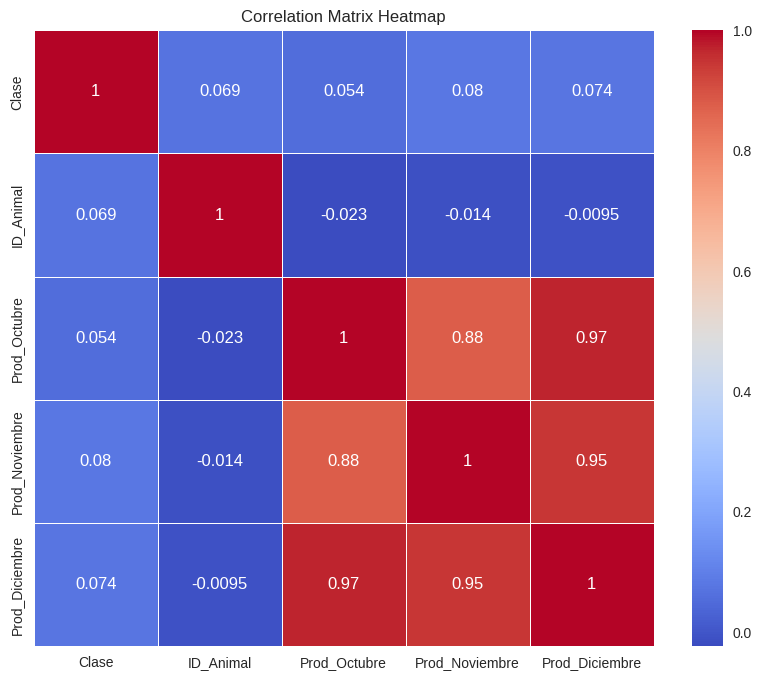

In [17]:
correlation_matrix = df_ganleche.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

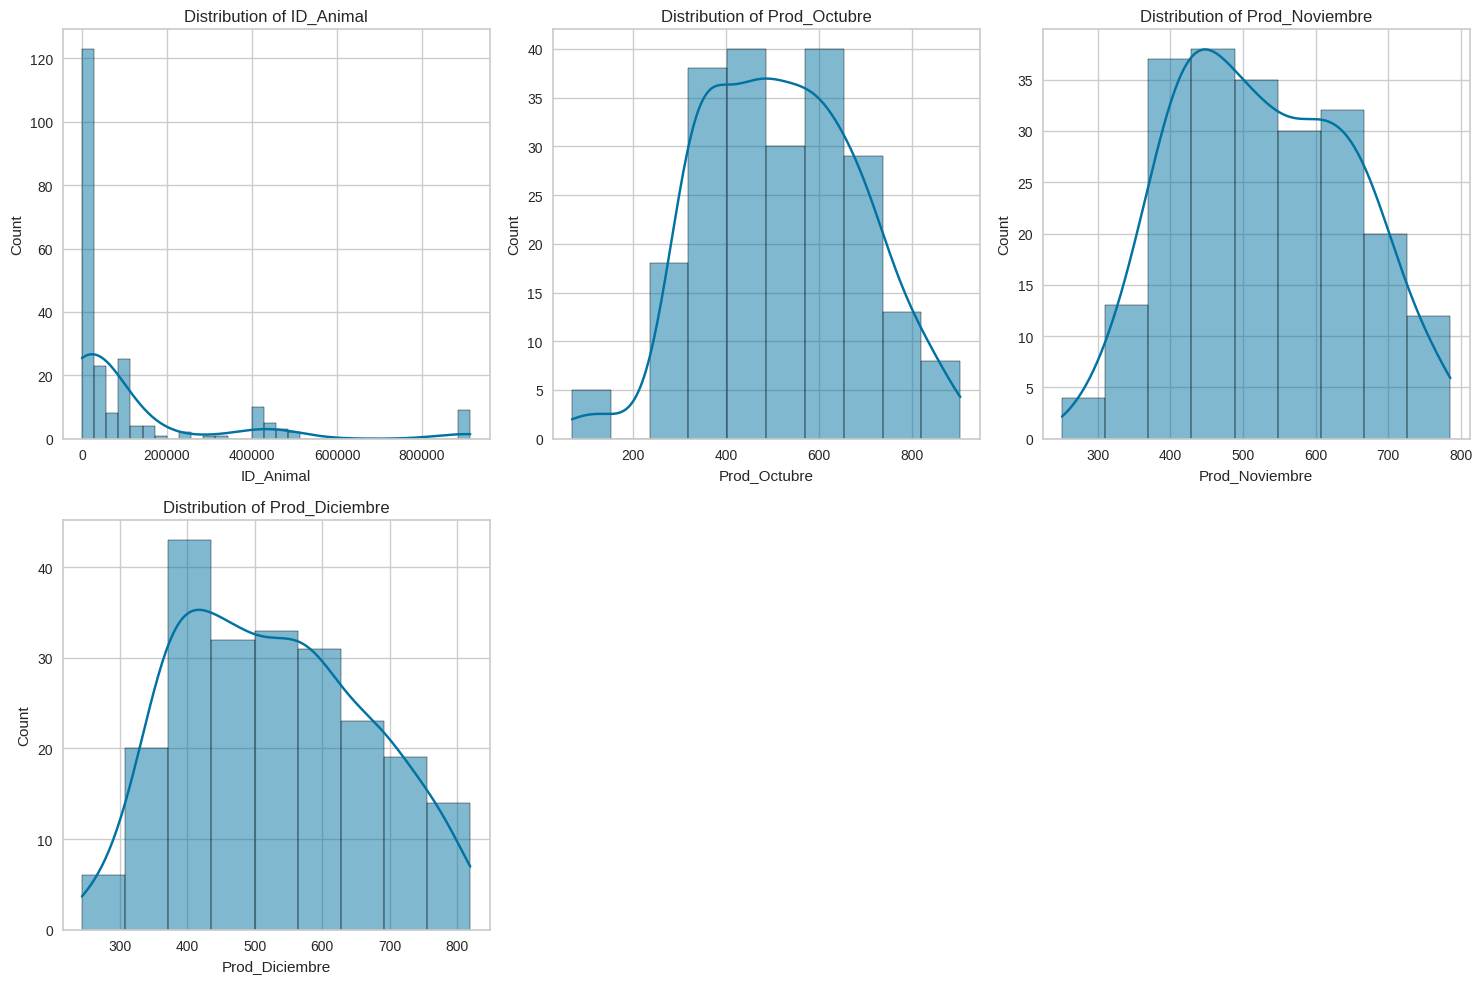

In [18]:
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(15, 10))

num_vars = len(numerical_df.columns)

for i, var in enumerate(numerical_df.columns, 1):
    plt.subplot((num_vars // 3) + 1, 3, i)
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

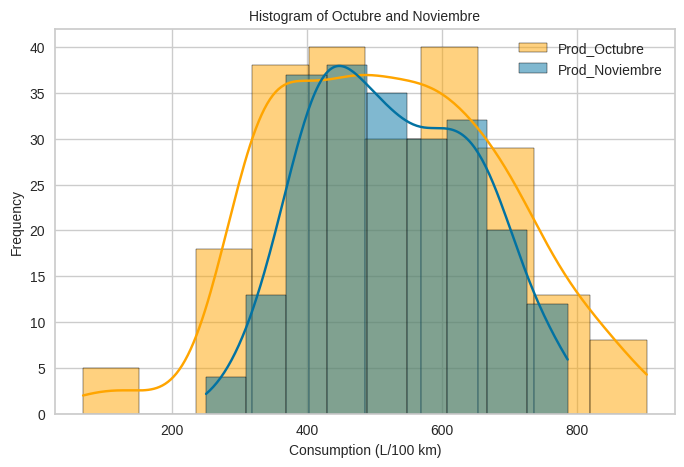

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="Prod_Octubre", kde=True, label = "Prod_Octubre",color = "orange")
sns.histplot(data=df, x="Prod_Noviembre", kde=True, label = "Prod_Noviembre")
plt.xlabel('Consumption (L/100 km)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title(f'Histogram of Octubre and Noviembre', fontsize=10)
plt.legend()
plt.show()

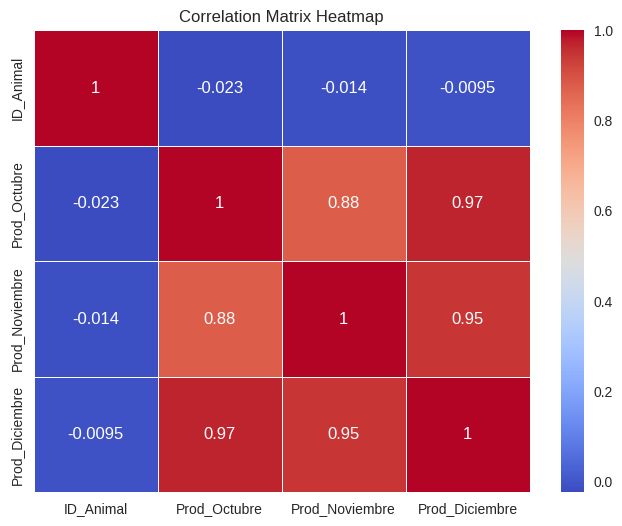

In [20]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

<Axes: xlabel='Prod_Octubre', ylabel='Prod_Diciembre'>

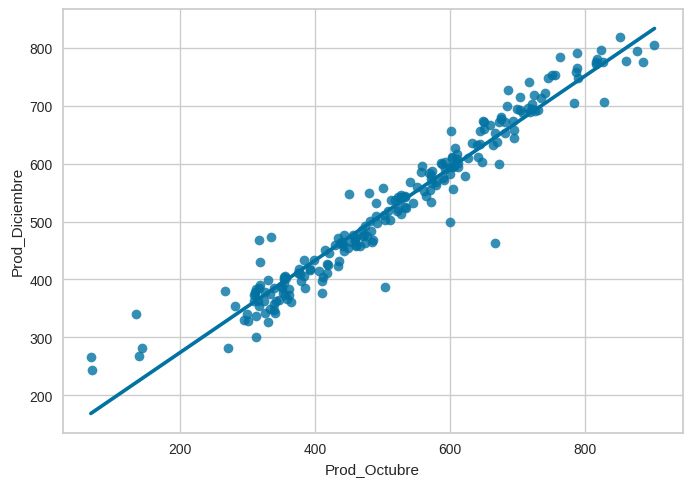

In [21]:
sns.regplot(x = 'Prod_Octubre', y = 'Prod_Diciembre', data=df, ci=None)

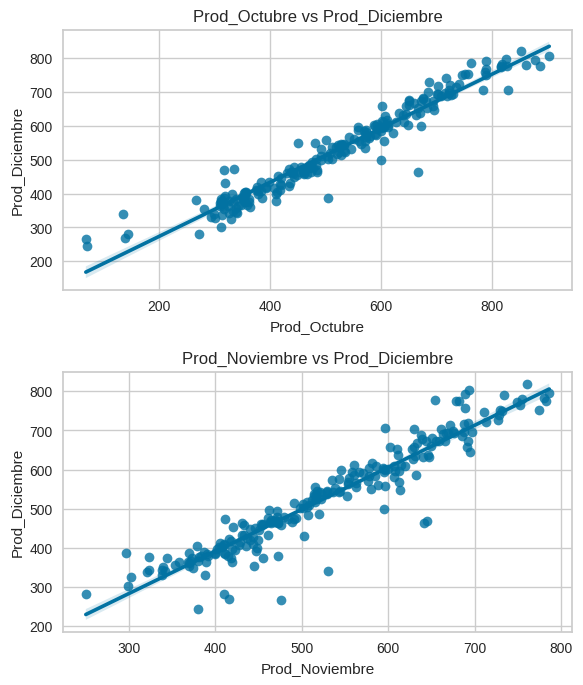

In [22]:
independent_variables = ['Prod_Octubre', 'Prod_Noviembre']
target_variable = 'Prod_Diciembre'

plt.figure(figsize=(6,10))

for i, var in enumerate(independent_variables):
    plt.subplot(3,1, i + 1)
    sns.regplot(x=df[var], y=df[target_variable])
    plt.title(f'{var} vs {target_variable}')

plt.tight_layout()
plt.show()

In [25]:
X = df[["Prod_Octubre", "Prod_Noviembre"]]
y = df["Prod_Diciembre"]

In [27]:
X.head()

,Prod_Octubre,Prod_Noviembre
0,579.57,612.78
1,461.34,490.88
2,681.97,610.37
3,470.60,520.05
4,466.58,454.51


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
print("Tamaño de la muestra incluida en el set de entrenamiento: {}\ny Tamaño de la muestra de entrenamiento: {}\nX Tamaño de la muestra que se incluye en el set de testing: {}\ny Tamaño de la muestra usada en prueba: {}"
      .format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

Tamaño de la muestra incluida en el set de entrenamiento: (154, 2)
y Tamaño de la muestra de entrenamiento: (154,)
X Tamaño de la muestra que se incluye en el set de testing: (67, 2)
y Tamaño de la muestra usada en prueba: (67,)


In [30]:
model_multi_lin_reg = LinearRegression()

In [31]:
model_multi_lin_reg.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = model_multi_lin_reg.predict(X_test)
y_train_pred = model_multi_lin_reg.predict(X_train)

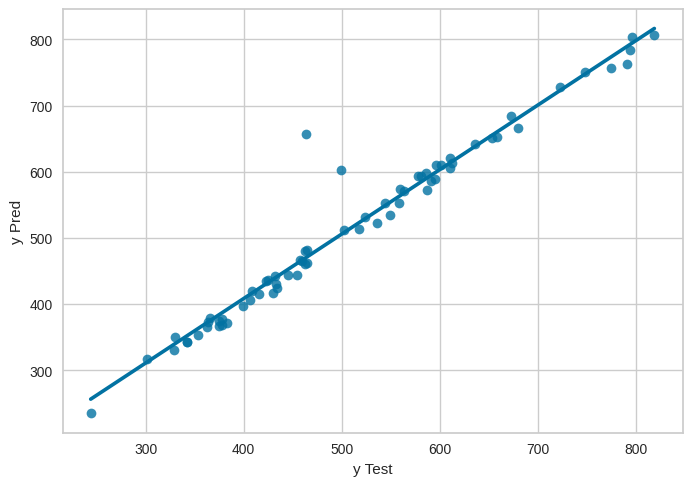

In [33]:
sns.regplot(x=y_test, y=y_pred, ci=None)
plt.xlabel('y Test')
plt.ylabel('y Pred')
plt.show()

In [34]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}
compare = pd.DataFrame(my_dict)
compare

,Actual,pred,residual
132,432.85,430.590781,2.259219
148,463.85,656.876932,-193.026932
93,374.90,367.446758,7.453242
180,818.96,806.185039,12.774961
15,672.33,683.853335,-11.523335
...,...,...,...
139,464.56,461.772627,2.787373
56,464.70,481.943370,-17.243370
156,795.82,804.285634,-8.465634
176,680.24,666.254179,13.985821


In [35]:
def train_val(y_train, y_train_pred, y_test, y_pred, i):

    scores = {
    i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}
    }

    return pd.DataFrame(scores)

In [36]:
mlr_score = train_val(y_train, y_train_pred, y_test, y_pred, "multi")
mlr_score

,multi_train,multi_test
R2,0.989046,0.955435
mae,10.451817,12.882992
mse,198.834099,819.888128
rmse,14.100855,28.633689


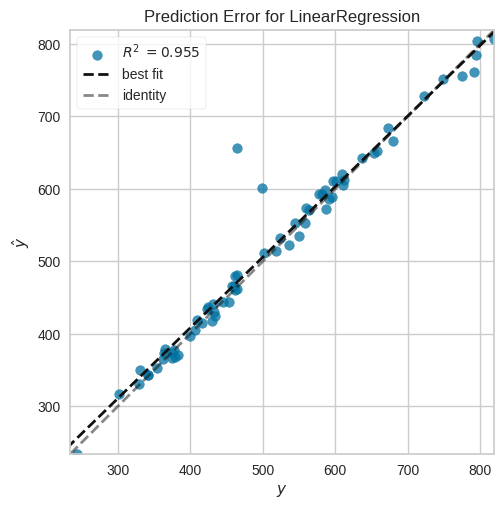

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [37]:
from yellowbrick.regressor import PredictionError

model = LinearRegression()

visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Mostrar los datos de prueba
visualizer.score(X_test, y_test)  # Evaluar el modelo en estos datos de prueba
visualizer.show()                 # Mostrar la gráfica